In [6]:
# Import all the packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy as sts
import numpy as np
import requests
import json

In [7]:
# Read given data
age_df= pd.read_csv("case_demographics_age.csv")
ca_pop_df= pd.read_csv("CA_pop_AGE.csv")
ca_deaths_df=pd.read_csv("deaths_age_statewide_by_month_2017-september2020.csv")

# set seed for reproducibility
np.random.seed(0) 

# Display the orginal data frame
age_df

,age_group,totalpositive,date,case_percent,deaths,deaths_percent,ca_percent
0,0-17,120,2020-04-02,NaN,NaN,NaN,NaN
1,18-49,5302,2020-04-02,NaN,NaN,NaN,NaN
2,50-64,2879,2020-04-02,NaN,NaN,NaN,NaN
3,65 and Older,2342,2020-04-02,NaN,NaN,NaN,NaN
4,Unknown,58,2020-04-02,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1125,0-17,109636,2020-11-13,10.9,2.0,0.0,22.5
1126,18-49,602180,2020-11-13,59.7,1321.0,7.2,43.5
1127,50-64,189615,2020-11-13,18.8,3487.0,19.1,18.4
1128,65+,106013,2020-11-13,10.5,13426.0,73.6,15.6


In [8]:
# Determine how clean is the data and what data cleaning is needed. 
# Look for missing data
# get the number of missing data points per column
missing_values_count = age_df.isnull().sum()

missing_values_count[0:7]

age_group           0
totalpositive       0
date                0
case_percent      100
deaths            100
deaths_percent    100
ca_percent        110
dtype: int64

In [9]:
# how many total missing values do we have?
total_cells = np.product( age_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

5.183312262958281

In [10]:
# Reorganize and clean data
reorganized_age_df= age_df.rename(columns={"date":"Date", "age_group":"Age Group", "totalpositive":"Total Positive", "case_percent":"Case Percent","deaths":"Deaths", "deaths_percent": "Death Percent", "ca_percent": "CA Percent"})
reorganized_age_df['Age Group']= reorganized_age_df['Age Group'].str.replace('Missing','Unknown', case=False)
reorganized_age_df['Age Group']= reorganized_age_df['Age Group'].str.replace('65 and Older','65+', case=False)
reorganized_age_df

,Age Group,Total Positive,Date,Case Percent,Deaths,Death Percent,CA Percent
0,0-17,120,2020-04-02,NaN,NaN,NaN,NaN
1,18-49,5302,2020-04-02,NaN,NaN,NaN,NaN
2,50-64,2879,2020-04-02,NaN,NaN,NaN,NaN
3,65+,2342,2020-04-02,NaN,NaN,NaN,NaN
4,Unknown,58,2020-04-02,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1125,0-17,109636,2020-11-13,10.9,2.0,0.0,22.5
1126,18-49,602180,2020-11-13,59.7,1321.0,7.2,43.5
1127,50-64,189615,2020-11-13,18.8,3487.0,19.1,18.4
1128,65+,106013,2020-11-13,10.5,13426.0,73.6,15.6


In [11]:
# replace all NA's with 0
clean_age_data_df= reorganized_age_df.fillna(0)
clean_age_data_df

,Age Group,Total Positive,Date,Case Percent,Deaths,Death Percent,CA Percent
0,0-17,120,2020-04-02,0.0,0.0,0.0,0.0
1,18-49,5302,2020-04-02,0.0,0.0,0.0,0.0
2,50-64,2879,2020-04-02,0.0,0.0,0.0,0.0
3,65+,2342,2020-04-02,0.0,0.0,0.0,0.0
4,Unknown,58,2020-04-02,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1125,0-17,109636,2020-11-13,10.9,2.0,0.0,22.5
1126,18-49,602180,2020-11-13,59.7,1321.0,7.2,43.5
1127,50-64,189615,2020-11-13,18.8,3487.0,19.1,18.4
1128,65+,106013,2020-11-13,10.5,13426.0,73.6,15.6


In [12]:
reduced_age_data_df= clean_age_data_df[['Age Group','Date','Total Positive','Deaths']]
reduced_age_data_df

,Age Group,Date,Total Positive,Deaths
0,0-17,2020-04-02,120,0.0
1,18-49,2020-04-02,5302,0.0
2,50-64,2020-04-02,2879,0.0
3,65+,2020-04-02,2342,0.0
4,Unknown,2020-04-02,58,0.0
...,...,...,...,...
1125,0-17,2020-11-13,109636,2.0
1126,18-49,2020-11-13,602180,1321.0
1127,50-64,2020-11-13,189615,3487.0
1128,65+,2020-11-13,106013,13426.0


In [13]:
reduced_age_data_df['Year']=reduced_age_data_df['Date'].str.split('-').str[0]
reduced_age_data_df['Month']=reduced_age_data_df['Date'].str.split('-').str[1]
reduced_age_data_df['Day']=reduced_age_data_df['Date'].str.split('-').str[2]
reduced_age_data_df[['Year', 'Month', 'Day']].groupby(['Year', 'Month']).max()

Day
Year Month    
2020 04     30
     05     31
     06     30
     07     31
     08     31
     09     30
     10     31
     11     13

In [14]:
last_days=['2020-04-30', '2020-05-31', '2020-06-30','2020-07-31','2020-08-31','2020-07-31', '2020-09-30','2020-10-31','2020-11-13']
month_end_covid_totals_age_data_df= reduced_age_data_df[reduced_age_data_df['Date'].isin(last_days)]
month_end_covid_totals_age_data_df=month_end_covid_totals_age_data_df[['Age Group','Total Positive', 'Deaths', 'Month', 'Year']]
month_end_covid_totals_age_data_df

,Age Group,Total Positive,Deaths,Month,Year
140,0-17,1449,0.0,04,2020
141,18-49,24613,137.0,04,2020
142,50-64,13044,308.0,04,2020
143,65+,11256,1543.0,04,2020
144,Unknown,80,0.0,04,2020
320,0-17,6488,0.0,05,2020
321,18-49,59144,231.0,05,2020
322,50-64,26405,636.0,05,2020
323,65+,20792,3213.0,05,2020
324,Unknown,177,0.0,05,2020


In [15]:
total_positive_df=reduced_age_data_df[['Age Group','Date','Total Positive']]
total_positive_df

,Age Group,Date,Total Positive
0,0-17,2020-04-02,120
1,18-49,2020-04-02,5302
2,50-64,2020-04-02,2879
3,65+,2020-04-02,2342
4,Unknown,2020-04-02,58
...,...,...,...
1125,0-17,2020-11-13,109636
1126,18-49,2020-11-13,602180
1127,50-64,2020-11-13,189615
1128,65+,2020-11-13,106013


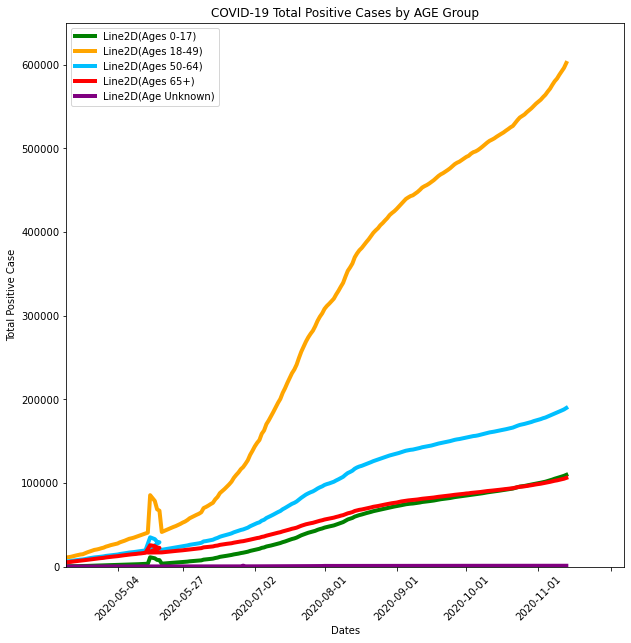

<Figure size 432x288 with 0 Axes>

In [16]:
# Create a line plot to show the total positive cases
fig=plt.figure(figsize=(10, 10))
#Identify Age Groups
age_group1='0-17'
age_group2='18-49'
age_group3='50-64'
age_group4='65+'
age_group5='Unknown'

# Create dataframes for age groups for total positive cases
age_group1_filter_df= total_positive_df['Age Group']=='0-17'
age_group1_total_positive_df=total_positive_df[age_group1_filter_df]

age_group2_filter_df= total_positive_df['Age Group']=='18-49'
age_group2_total_positive_df=total_positive_df[age_group2_filter_df]

age_group3_filter_df= total_positive_df['Age Group']=='50-64'
age_group3_total_positive_df=total_positive_df[age_group3_filter_df]

age_group4_filter_df= total_positive_df["Age Group"]=='65+'
age_group4_total_positive_df=total_positive_df[age_group4_filter_df]

age_group5_filter_df= total_positive_df['Age Group']=='Unknown'
age_group5_total_positive_df=total_positive_df[age_group5_filter_df]

# Identify variables for each group:
age_group1_dates= age_group1_total_positive_df['Date']
age_group1_total_positives= age_group1_total_positive_df['Total Positive']

age_group2_dates= age_group2_total_positive_df['Date']
age_group2_total_positives= age_group2_total_positive_df['Total Positive']

age_group3_dates= age_group3_total_positive_df['Date']
age_group3_total_positives= age_group3_total_positive_df['Total Positive']

age_group4_dates= age_group4_total_positive_df['Date']
age_group4_total_positives= age_group4_total_positive_df['Total Positive']

age_group5_dates= age_group5_total_positive_df['Date']
age_group5_total_positives= age_group5_total_positive_df['Total Positive']

# Add labels to X and Y axes :: Add title
plt.title("COVID-19 Total Positive Cases by AGE Group")
plt.xlabel("Dates")
plt.ylabel("Total Positive Case")

# Set the limits for the X and Y axes
plt.xlim(10,250)
plt.ylim(0,650000)

#Plot age group 1
age_group1, =plt.plot(age_group1_dates, age_group1_total_positives, color="green", label="Ages 0-17", linewidth=4)

#Plot age group 2
age_group2, =plt.plot(age_group2_dates, age_group2_total_positives, color="orange", label="Ages 18-49", linewidth=4)

#Plot age group 3
age_group3, =plt.plot(age_group3_dates, age_group3_total_positives, color="deepskyblue", label="Ages 50-64", linewidth=4)

#Plot age group 4
age_group4, =plt.plot(age_group4_dates, age_group4_total_positives, color="red", label="Ages 65+", linewidth=4)

#Plot age group 5

age_group5, =plt.plot(age_group5_dates, age_group5_total_positives, color="purple", label="Age Unknown", linewidth=4)

# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
plt.xticks(rotation=45)
# Specify formatter
# X.set_major_formatter(fmt)


# Create a legend for our chart
plt.legend([age_group1, age_group2, age_group3, age_group4, age_group5])

plt.savefig('COVID-19_Total_Positive_Cases_by_AGE_Group.png')
# Show the chart
plt.show()
plt.tight_layout()

In [17]:
# Compare totals with best current population estimate
# Pull 2020 column and merge rows by age group
newheaders_ca_pop_df=ca_pop_df.iloc[1]
ca_pop_df=ca_pop_df[3:]
ca_pop_df.columns= newheaders_ca_pop_df
ca_pop_df=ca_pop_df[:-1]
ca_pop_df

1,Population,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
3,0,"493,645","510,167","496,655","499,055","498,884","501,018","488,592","482,306","461,623",...,"426,362","424,833","424,377","423,274","423,193","422,790","423,075","423,537","423,854","424,551"
4,1,"496,803","492,790","509,300","495,850","498,214","498,138","500,354","487,869","481,654",...,"427,778","425,635","424,149","423,696","422,644","422,466","422,160","422,404","422,899","423,144"
5,2,"512,026","496,473","490,626","507,297","492,021","493,339","490,743","494,105","481,869",...,"421,716","419,419","417,357","415,913","415,744","414,613","414,344","413,896","414,440","414,827"
6,3,"516,440","514,022","500,614","493,207","511,871","495,820","494,651","493,427","495,843",...,"426,955","425,515","422,971","421,263","419,520","419,176","418,028","417,902","417,148","417,969"
7,4,"509,839","518,920","517,407","504,145","496,032","516,732","499,928","498,643","497,614",...,"434,865","432,810","431,896","428,597","426,807","425,479","424,977","424,112","423,688","423,021"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,96,"10,693","10,479","10,119","9,503","8,915","8,531","8,162","11,457","13,845",...,"78,300","80,575","83,423","85,722","87,077","92,324","92,156","92,207","94,708","95,218"
100,97,"7,799","7,639","7,432","6,902","6,128","5,027","4,649","4,732","6,661",...,"59,607","63,043","65,039","67,300","69,451","70,770","74,987","75,064","75,196","77,314"
101,98,"5,354","5,268","4,992","4,686","4,178","3,281","2,572","2,474","2,889",...,"44,975","48,120","50,873","52,533","54,557","56,316","57,400","60,859","61,275","61,374"
102,99,"3,619","3,551","3,358","2,933","2,709","2,158","1,756","1,546","1,554",...,"34,456","36,264","38,860","41,158","42,801","44,419","45,850","46,809","49,661","50,232"


In [18]:
ca_pop_2020_df=ca_pop_df[['Population', '2020']].copy()
ca_pop_2020_df.reset_index(inplace= True)
ca_pop_2020_df=ca_pop_df[['Population', '2020']].copy()
ca_pop_2020_df

1,Population,2020
3,0,"458,584"
4,1,"450,783"
5,2,"454,325"
6,3,"475,575"
7,4,"485,958"
...,...,...
99,96,"21,404"
100,97,"12,190"
101,98,"6,593"
102,99,"3,199"


In [19]:
ca_pop_2020_df.replace(',','', regex=True, inplace=True)
ca_pop_2020_df['2020']= pd.to_numeric(ca_pop_2020_df['2020'])
ca_pop_2020_df

1,Population,2020
3,0,458584
4,1,450783
5,2,454325
6,3,475575
7,4,485958
...,...,...
99,96,21404
100,97,12190
101,98,6593
102,99,3199


In [20]:
ca_pop_2020_df['2020']=ca_pop_2020_df['2020'].astype(int)
ca_pop_2020_df['2020'].dtypes

dtype('int64')

In [21]:
# Calculate Total Population of California for 2020:
total_ca_pop_2020= ca_pop_2020_df['2020'].sum()
total_ca_pop_2020

40129160

In [22]:
# Caluculate California Age Group Poplations for 2020:

age_group_1_pop_df= ca_pop_2020_df.loc[3:20,:]
age_group_1_pop_2020= age_group_1_pop_df['2020'].sum()

age_group_2_pop_df= ca_pop_2020_df.loc[21:52,:]
age_group_2_pop_2020= age_group_2_pop_df['2020'].sum()

age_group_3_pop_df= ca_pop_2020_df.loc[53:67,:]
age_group_3_pop_2020= age_group_3_pop_df['2020'].sum()

age_group_4_pop_df= ca_pop_2020_df.loc[68:,:]
age_group_4_pop_2020= age_group_4_pop_df['2020'].sum()

# Create a dataframe of the California 2020 population totals for each age group
ca_pop_age_groups=['0-17','18-49','50-64','65+']
age_group_pop_2020_values=['9026052','17464204','7390764','6248140']



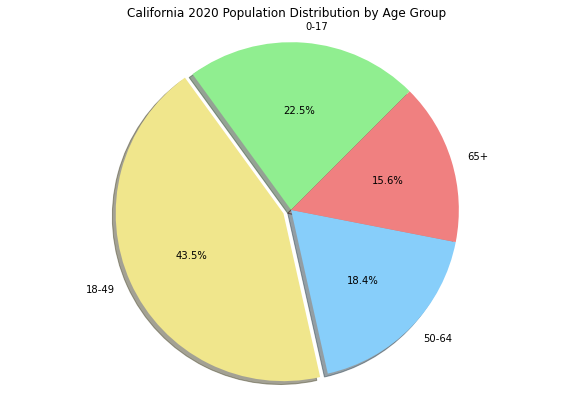

In [23]:
#Do a pie plot for the distribution for California's population for 2020 poulation by age.

ca_pop_age_groups=['0-17','18-49','50-64','65+']
age_group_pop_2020_values=['9026052','17464204','7390764','6248140']
colors = ["lightgreen","khaki","lightskyblue","lightcoral"]
explode = (0, 0.05, 0, 0,)

# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.title("California 2020 Population Distribution by Age Group")
plt.pie(age_group_pop_2020_values, explode=explode, labels= ca_pop_age_groups, colors=colors, autopct= "%1.1f%%", shadow= True, startangle=45) 

plt.axis("equal") 

plt.savefig('California_2020_Population_Distribution_by_Age_Group.png')
#show plot 
plt.show() 

In [24]:
final_totals_filter= reduced_age_data_df['Date']=='2020-11-13'
last_totals_age_data_df= reduced_age_data_df[final_totals_filter]
last_totals_age_data_df

,Age Group,Date,Total Positive,Deaths,Year,Month,Day
1125,0-17,2020-11-13,109636,2.0,2020,11,13
1126,18-49,2020-11-13,602180,1321.0,2020,11,13
1127,50-64,2020-11-13,189615,3487.0,2020,11,13
1128,65+,2020-11-13,106013,13426.0,2020,11,13
1129,Unknown,2020-11-13,933,1.0,2020,11,13


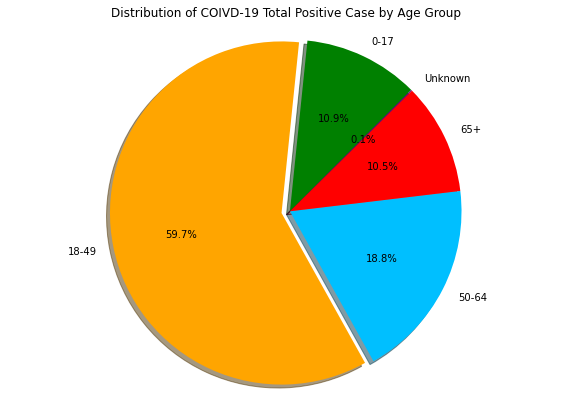

In [25]:
# Generate a pie plot showing the distribution of Total Positive Cases for each age group 

covid_data_age_groups= ['0-17','18-49','50-64','65+','Unknown']
total_positve = [109636, 602180, 189615, 106013, 933]
colors = ["green","orange","deepskyblue","red","purple"]
explode = (0, 0.05, 0, 0,0)

# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.title("Distribution of COIVD-19 Total Positive Case by Age Group")
plt.pie(total_positve, explode=explode, labels= covid_data_age_groups, colors=colors, autopct= "%1.1f%%", shadow= True, startangle=45) 

plt.axis("equal")
plt.savefig('Distribution_of_COIVD-19_Total_Positive_Case_by_Age_Group.png')
#show plot 
plt.show() 


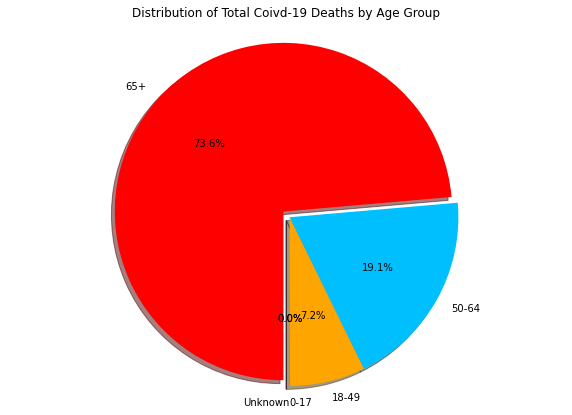

In [26]:
# Generate a pie plot showing the distribution of Total Deaths for each age group 

covid_data_age_groups= ['0-17','18-49','50-64','65+','Unknown']
covid_data_age_groups_total_deaths = [2,1321,3487,13426, 1]
colors = ["green","orange","deepskyblue","red","purple"]
explode = (0, 0, 0, 0.05,0)

# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.title("Distribution of Total Coivd-19 Deaths by Age Group")
plt.pie(covid_data_age_groups_total_deaths, explode=explode, labels= covid_data_age_groups , colors=colors, autopct= "%1.1f%%", shadow= True, startangle=270) 

plt.axis("equal") 

plt.savefig('Distribution of Total Coivd-19 Deaths by Age Group')

#show plot
plt.show() 


In [27]:
#Create a data frame for death totals by month
covid_deaths_month_totals_df=month_end_covid_totals_age_data_df[['Age Group','Month', 'Year', 'Deaths']]
covid_deaths_month_totals_df

,Age Group,Month,Year,Deaths
140,0-17,04,2020,0.0
141,18-49,04,2020,137.0
142,50-64,04,2020,308.0
143,65+,04,2020,1543.0
144,Unknown,04,2020,0.0
320,0-17,05,2020,0.0
321,18-49,05,2020,231.0
322,50-64,05,2020,636.0
323,65+,05,2020,3213.0
324,Unknown,05,2020,0.0


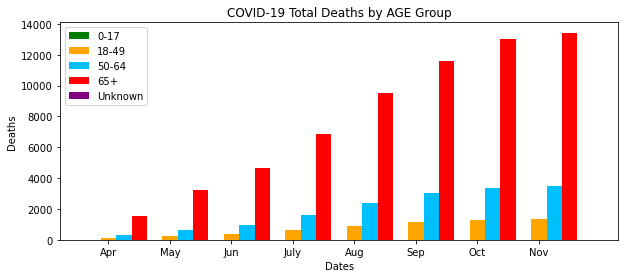

<Figure size 432x288 with 0 Axes>

In [28]:
# Create a bar plot to show the total positive cases
fig=plt.figure(figsize=(10, 4))
bar_width = 0.25
opacity = 0.8


#Identify Age Groups
age_group1='0-17'
age_group2='18-49'
age_group3='50-64'
age_group4='65+'
age_group5='Unknown'

# Create dataframes for age groups for COVID Deaths
covid_age_group1_filter_df= covid_deaths_month_totals_df['Age Group']=='0-17'
age_group1_covid_deaths_df=covid_deaths_month_totals_df[covid_age_group1_filter_df]

covid_age_group2_filter_df= covid_deaths_month_totals_df['Age Group']=='18-49'
age_group2_covid_deaths_df=covid_deaths_month_totals_df[covid_age_group2_filter_df]

covid_age_group3_filter_df= covid_deaths_month_totals_df['Age Group']=='50-64'
age_group3_covid_deaths_df=covid_deaths_month_totals_df[covid_age_group3_filter_df]

covid_age_group4_filter_df= covid_deaths_month_totals_df["Age Group"]=='65+'
age_group4_covid_deaths_df=covid_deaths_month_totals_df[covid_age_group4_filter_df]

covid_age_group5_filter_df= covid_deaths_month_totals_df['Age Group']=='Unknown'
age_group5_covid_deaths_df= covid_deaths_month_totals_df[covid_age_group5_filter_df]

# Identify variables for each group:
covid_age_group1_dates= age_group1_covid_deaths_df['Month']
covid_age_group1_deaths= age_group1_covid_deaths_df['Deaths']

covid_age_group2_dates= age_group2_covid_deaths_df['Month']
covid_age_group2_deaths= age_group2_covid_deaths_df['Deaths']

covid_age_group3_dates= age_group3_covid_deaths_df['Month']
covid_age_group3_deaths= age_group3_covid_deaths_df['Deaths']

covid_age_group4_dates= age_group4_covid_deaths_df['Month']
covid_age_group4_deaths=age_group4_covid_deaths_df['Deaths']

covid_age_group5_dates= age_group5_covid_deaths_df['Month']
covid_age_group5_deaths= age_group5_covid_deaths_df['Deaths']

# Set height of bar
bar1= covid_age_group1_deaths
bar2= covid_age_group2_deaths
bar3= covid_age_group3_deaths
bar4= covid_age_group4_deaths
bar5= covid_age_group5_deaths

# Set postion of bar on X axis
r1 = np.arange(len(bar1))
r2 = [x+ bar_width for x in r1]
r3 = [x+ bar_width for x in r2]
r4 = [x+ bar_width for x in r3]
r5 = [x+ bar_width for x in r4]

# Make the plot

plt.bar(r1, bar1, width= bar_width, color="green", label="Ages 0-17")
plt.bar(r2, bar2, width= bar_width, color="orange", label="Ages 18-49")
plt.bar(r3, bar3, width= bar_width , color="deepskyblue", label="Ages 50-64")
plt.bar(r4, bar4, width= bar_width, color="red", label="Ages 65+")
plt.bar(r5, bar5, width=bar_width, color="purple", label="Age Unknown")


# Add labels to X and Y axes :: Add title
plt.title("COVID-19 Total Deaths by AGE Group")
plt.xlabel("Dates")
plt.ylabel("Deaths")

# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

# X = plt.gca().xaxis
# X.set_major_locator(locator)
plt.xticks([r + bar_width for r in range(len(bar1))], ['Apr', 'May', 'Jun', 'July','Aug','Sep','Oct', 'Nov'])
# Specify formatter
# X.set_major_formatter(fmt)

# Create a legend for our chart
plt.legend([age_group1, age_group2, age_group3, age_group4, age_group5])

plt.savefig('COVID-19_Total_Deaths_Cases_by_AGE_Group.png')
# Show the chart
plt.show()
plt.tight_layout()